# Import required libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

# Unpack and split the dataset

In [36]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels),(test_images, test_labels) = objects.load_data()
#splitting  training data  into 80% for training and 20% for validation
training_images,validation_images, training_labels,validation_labels = train_test_split( training_images, training_labels, test_size=0.2, random_state=0)


The number of images used for training and testing

In [32]:
len(training_images )

48000

In [33]:
len(test_images)

10000

In [34]:
len(validation_images)

12000

# Sample images used in training the model

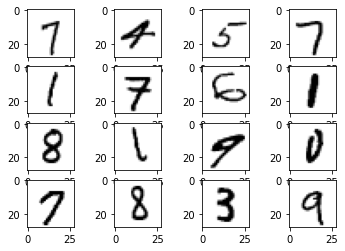

In [37]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [38]:
print(training_images.shape)
print(training_images[0])

(48000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  48 131 214
  210   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  3

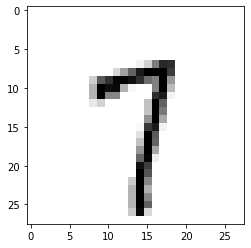

In [39]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [40]:
training_images  = training_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images/255.0

In [41]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

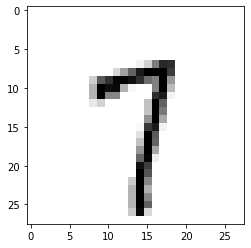

In [42]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [43]:
# Here the architecure of the model is defined

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
# validation_images

# Training

In [47]:
# model.fit(training_images, training_labels, epochs=5)
history = model.fit(training_images, training_labels, epochs=10, validation_data = (validation_images, validation_labels))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.9155 - val_loss: 0.1572 - val_accuracy: 0.9529
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1320 - accuracy: 0.9617 - val_loss: 0.1082 - val_accuracy: 0.9689
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9739 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.0827 - val_accuracy: 0.9747
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0809 - val_accuracy: 0.9751
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0785 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0753 - val_accuracy:

In [48]:
history.history

{'loss': [0.29239368438720703,
  0.13202033936977386,
  0.0894521102309227,
  0.06840547174215317,
  0.052087340503931046,
  0.04064624384045601,
  0.03286677598953247,
  0.026465846225619316,
  0.02035457268357277,
  0.016588348895311356],
 'accuracy': [0.9155208468437195,
  0.9616666436195374,
  0.9738749861717224,
  0.9791250228881836,
  0.9846041798591614,
  0.9878333210945129,
  0.9899166822433472,
  0.9915833473205566,
  0.9939374923706055,
  0.9951249957084656],
 'val_loss': [0.15719686448574066,
  0.1081540659070015,
  0.10283636301755905,
  0.08274431526660919,
  0.08089490234851837,
  0.07852794229984283,
  0.07531768083572388,
  0.08072756975889206,
  0.08145302534103394,
  0.0850181058049202],
 'val_accuracy': [0.95291668176651,
  0.968916654586792,
  0.9700000286102295,
  0.9746666550636292,
  0.9750833511352539,
  0.9754999876022339,
  0.9786666631698608,
  0.9759166836738586,
  0.9778333306312561,
  0.9763333201408386]}

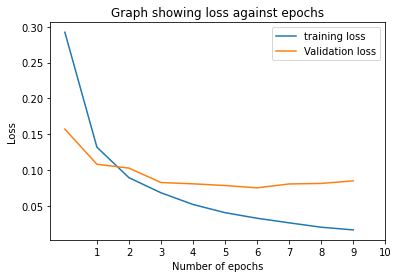

In [49]:
plt.plot(history.history['loss'], label="training loss" )
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Graph showing loss against epochs')
plt.xlabel('Number of epochs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Loss')
plt.legend()
plt.show()

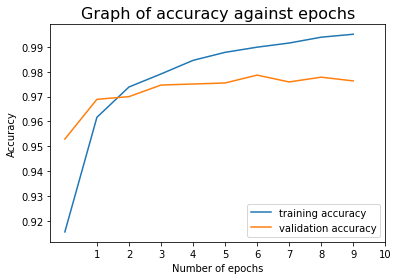

In [51]:
plt.plot(history.history['accuracy'], label="training accuracy" )
plt.plot(history.history['val_accuracy'], label="validation accuracy" )
plt.title('Graph of accuracy against epochs', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model evaluation

In [52]:

print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.9750
[0.08947933465242386, 0.9750000238418579]


In [62]:
psix = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], psix.argmax(axis=1), psix.max(axis=1)




(6, array([6], dtype=int64), array([0.9847296], dtype=float32))

In [63]:
pnine = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], psix.argmax(axis=1), psix.max(axis=1)

(9, array([6], dtype=int64), array([0.9847296], dtype=float32))

In [55]:
#Getting 6
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        print(i)
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)


11
21
22
50
54
66
81
88
91
98


(10, 10)

In [22]:
#Getting 4
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

4
6
19
24
27
33
42
48
49
56


(10, 10)

In [56]:
#Getting 9 
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

7
9
12
16
20
58
62
73
78
92


(10, 10)

In [57]:
psix[0][8]
print(psix[0])

[2.5882186e-06 1.8950543e-09 3.1665129e-06 8.5269882e-08 1.6532063e-07
 1.5259056e-02 9.8472959e-01 9.8510455e-10 5.3405533e-06 7.1439288e-08]


<BarContainer object of 10 artists>

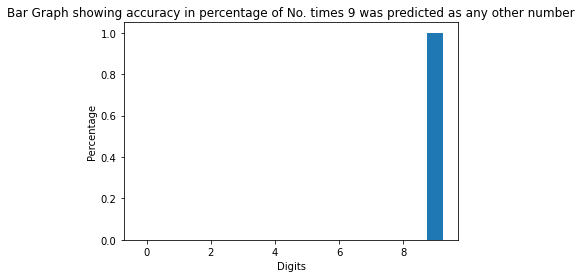

In [64]:
# help(plt.bar)
#Predicting 9
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5)

In [65]:
#predicting digit 6
psix = model.predict(test_images[11].reshape(-1,28,28))
test_labels[11], psix.argmax(axis=1), psix.max(axis=1)

(6, array([6], dtype=int64), array([0.9999888], dtype=float32))

<BarContainer object of 10 artists>

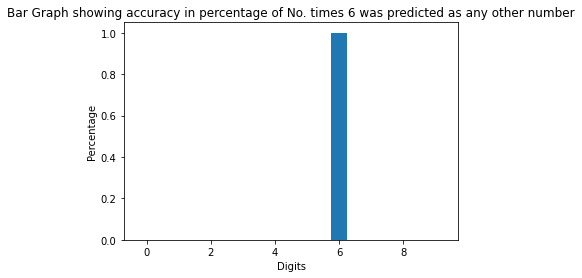

In [66]:
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [67]:
pfour = model.predict(test_images[19].reshape(-1,28,28))
test_labels[19], pfour.argmax(axis=1), pfour.max(axis=1)

(4, array([4], dtype=int64), array([0.99999976], dtype=float32))

<BarContainer object of 10 artists>

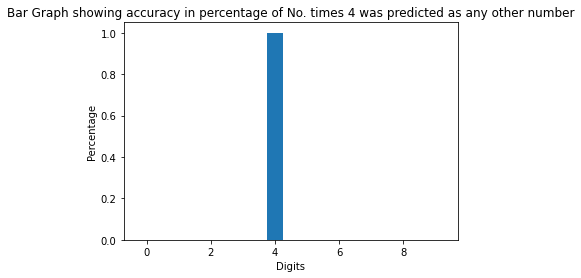

In [68]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

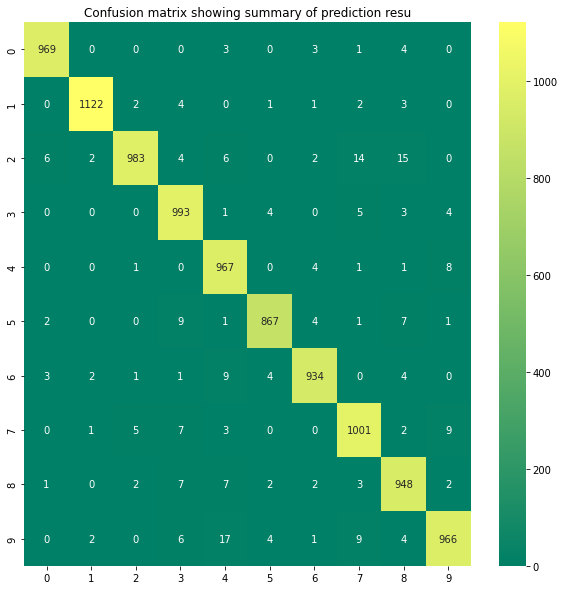

In [70]:
arr = confusion_matrix(test_labels , np.argmax(model.predict(test_images) , axis =1))

plt.figure(figsize=(10 , 10))
sns.heatmap(arr ,
            cmap = 'summer',
            fmt ='g',
            annot=True 
            )
plt.title("Confusion matrix showing summary of prediction resu")
plt.show()

In [71]:
model.save('mnist_grp1.model')

INFO:tensorflow:Assets written to: mnist_grp1.model\assets


In [54]:
saved_model = tf.keras.models.load_model('mnist_grp1.model')